# Customer segmentation task

## Multiclass classification

In [2]:
import matplotlib as mlp

mlp.rcParams['lines.linewidth'] = 5
mlp.rcParams['xtick.major.size'] = 20
mlp.rcParams['xtick.major.width'] = 5
mlp.rcParams['xtick.labelsize'] = 20
mlp.rcParams['xtick.color'] = '#FF5533'

mlp.rcParams['ytick.major.size'] = 20
mlp.rcParams['ytick.major.width'] = 5
mlp.rcParams['ytick.labelsize'] = 20
mlp.rcParams['ytick.color'] = '#FF5533'

mlp.rcParams['axes.labelsize'] = 20
mlp.rcParams['axes.titlesize'] = 20
mlp.rcParams['axes.titlecolor'] = '#00B050'
mlp.rcParams['axes.labelcolor'] = '#00B050'

import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('segmentation_data.csv')

df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [5]:
#noncategorical columns

numerical_columns = df.loc[:, df.dtypes!=object].columns
df.loc[:, df.dtypes!=object]

,ID,Age,Work_Experience,Family_Size
0,462809,22,1.0,4.0
1,462643,38,NaN,3.0
2,466315,67,1.0,1.0
3,461735,67,0.0,2.0
4,462669,40,NaN,6.0
...,...,...,...,...
8063,464018,22,0.0,7.0
8064,464685,35,3.0,4.0
8065,465406,33,1.0,1.0
8066,467299,27,1.0,4.0


In [6]:
#Set ID as index

df = df.set_index('ID')
numerical_columns = numerical_columns.drop('ID')

In [7]:
#categorical columns

categorical_columns = df.loc[:, df.dtypes==object].columns
df.loc[:, df.dtypes==object]

,Gender,Ever_Married,Graduated,Profession,Spending_Score,Var_1,Segmentation
ID,,,,,,,
462809,Male,No,No,Healthcare,Low,Cat_4,D
462643,Female,Yes,Yes,Engineer,Average,Cat_4,A
466315,Female,Yes,Yes,Engineer,Low,Cat_6,B
461735,Male,Yes,Yes,Lawyer,High,Cat_6,B
462669,Female,Yes,Yes,Entertainment,High,Cat_6,A
...,...,...,...,...,...,...,...
464018,Male,No,No,NaN,Low,Cat_1,D
464685,Male,No,No,Executive,Low,Cat_4,D
465406,Female,No,Yes,Healthcare,Low,Cat_6,D


# EDA

### numerical features processing

In [8]:
df.describe()

,Age,Work_Experience,Family_Size
count,8068.000000,7239.000000,7733.000000
mean,43.466906,2.641663,2.850123
std,16.711696,3.406763,1.531413
min,18.000000,0.000000,1.000000
25%,30.000000,0.000000,2.000000
50%,40.000000,1.000000,3.000000
75%,53.000000,4.000000,4.000000
max,89.000000,14.000000,9.000000


In [9]:
#fill the gaps the dataset with the mean value

for col in numerical_columns:
    df[col] = df[col].fillna(df[col].mean())

In [10]:
df[numerical_columns].isna().sum()

Age                0
Work_Experience    0
Family_Size        0
dtype: int64

In [11]:
#correlation of numerical features

df[numerical_columns].corr()

,Age,Work_Experience,Family_Size
Age,1.000000,-0.179361,-0.273291
Work_Experience,-0.179361,1.000000,-0.058702
Family_Size,-0.273291,-0.058702,1.000000


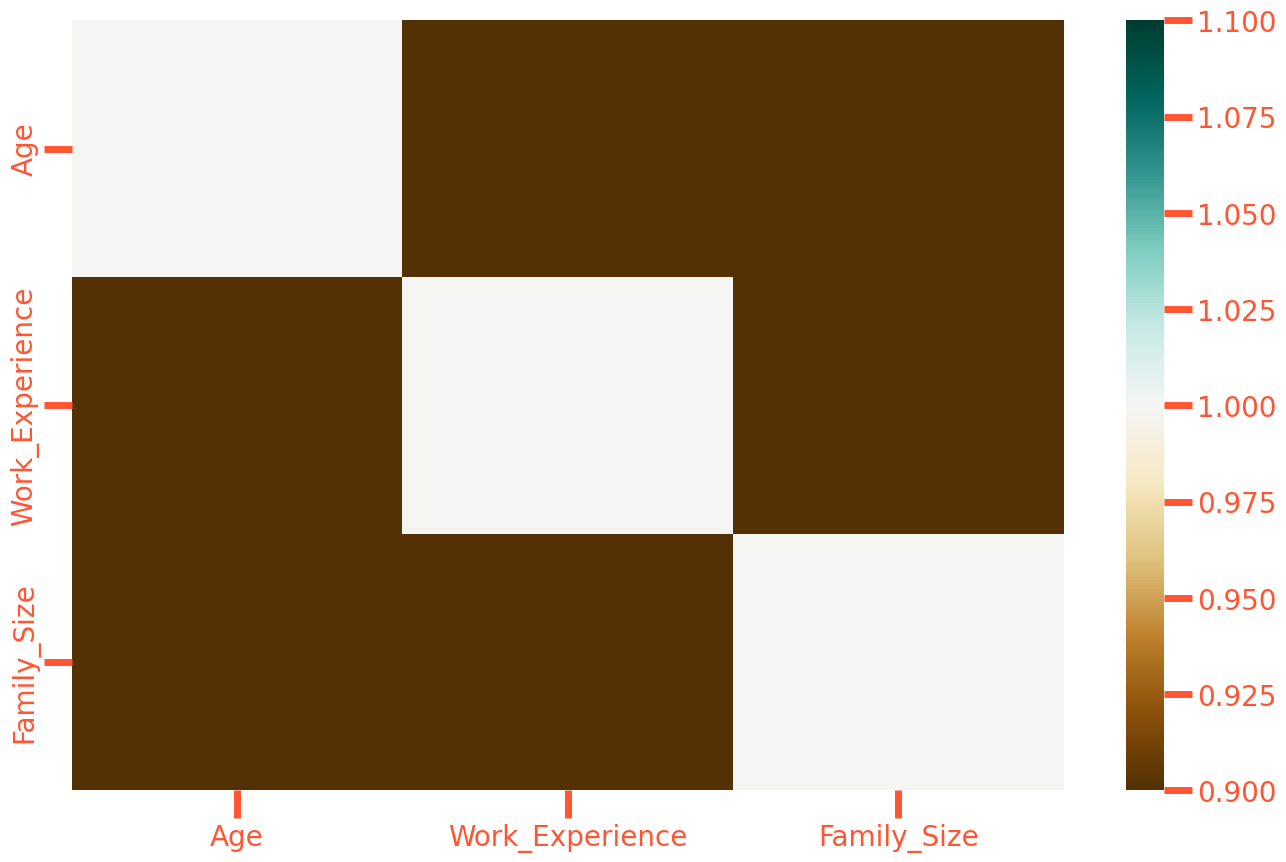

In [12]:
#heatmap of correlation between numerical features

fig = plt.figure()
fig.set_size_inches(16, 10)

sns.heatmap(df[numerical_columns].corr(),
           cmap='BrBG',
           vmin=1,
           vmax=1)
plt.show()

In [13]:
#top correlated features

def get_redundant_pairs(df):
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations\n")
print(get_top_abs_correlations(df[numerical_columns], 10))

Top Absolute Correlations

Age              Family_Size        0.273291
                 Work_Experience    0.179361
Work_Experience  Family_Size        0.058702
dtype: float64


In [14]:
# check if there are any quasi-constant features

from sklearn.feature_selection import VarianceThreshold

cutter = VarianceThreshold(threshold=0.1)
cutter.fit(df[numerical_columns])

cutter.get_feature_names_out()

array(['Age', 'Work_Experience', 'Family_Size'], dtype=object)

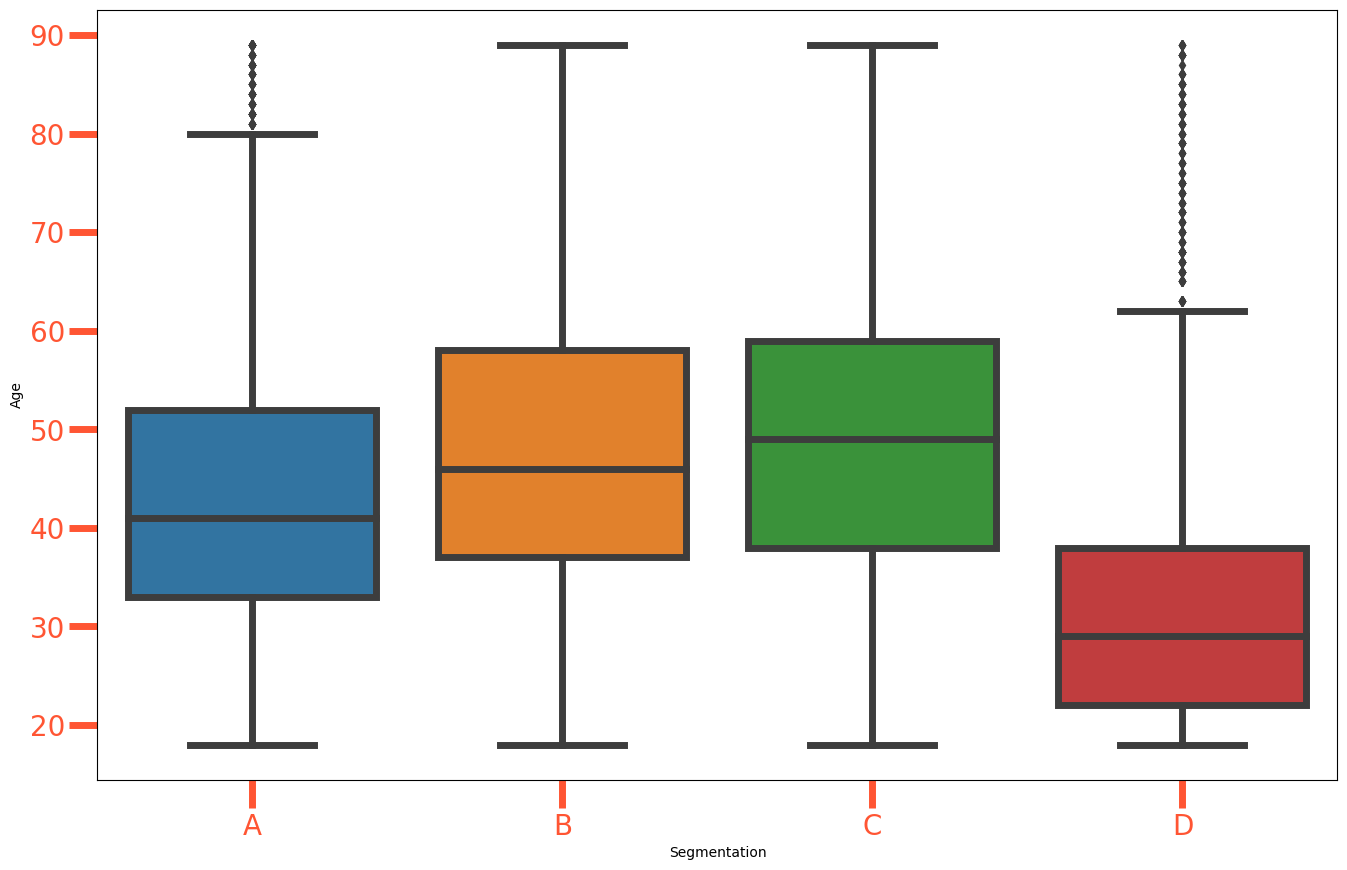

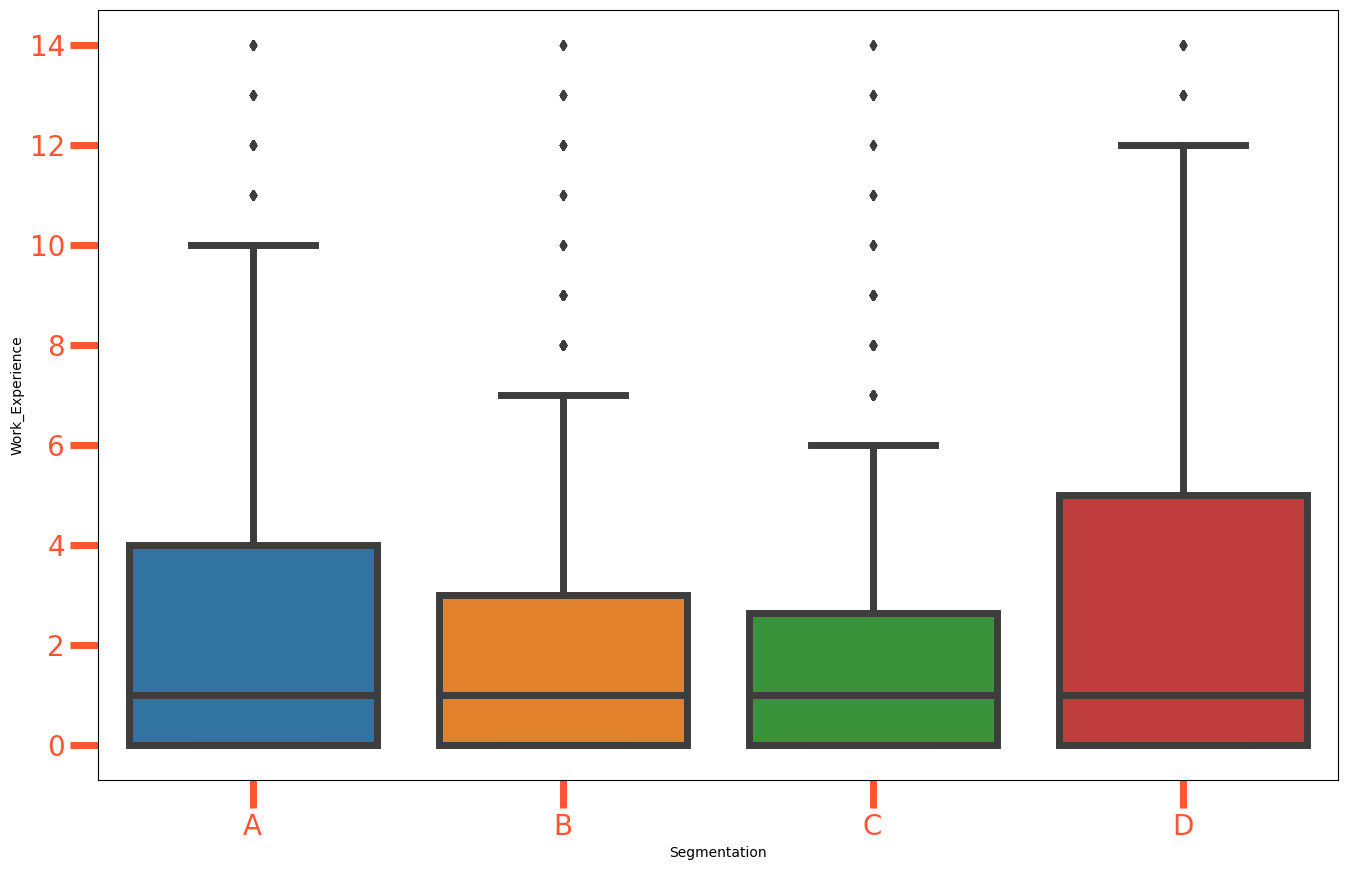

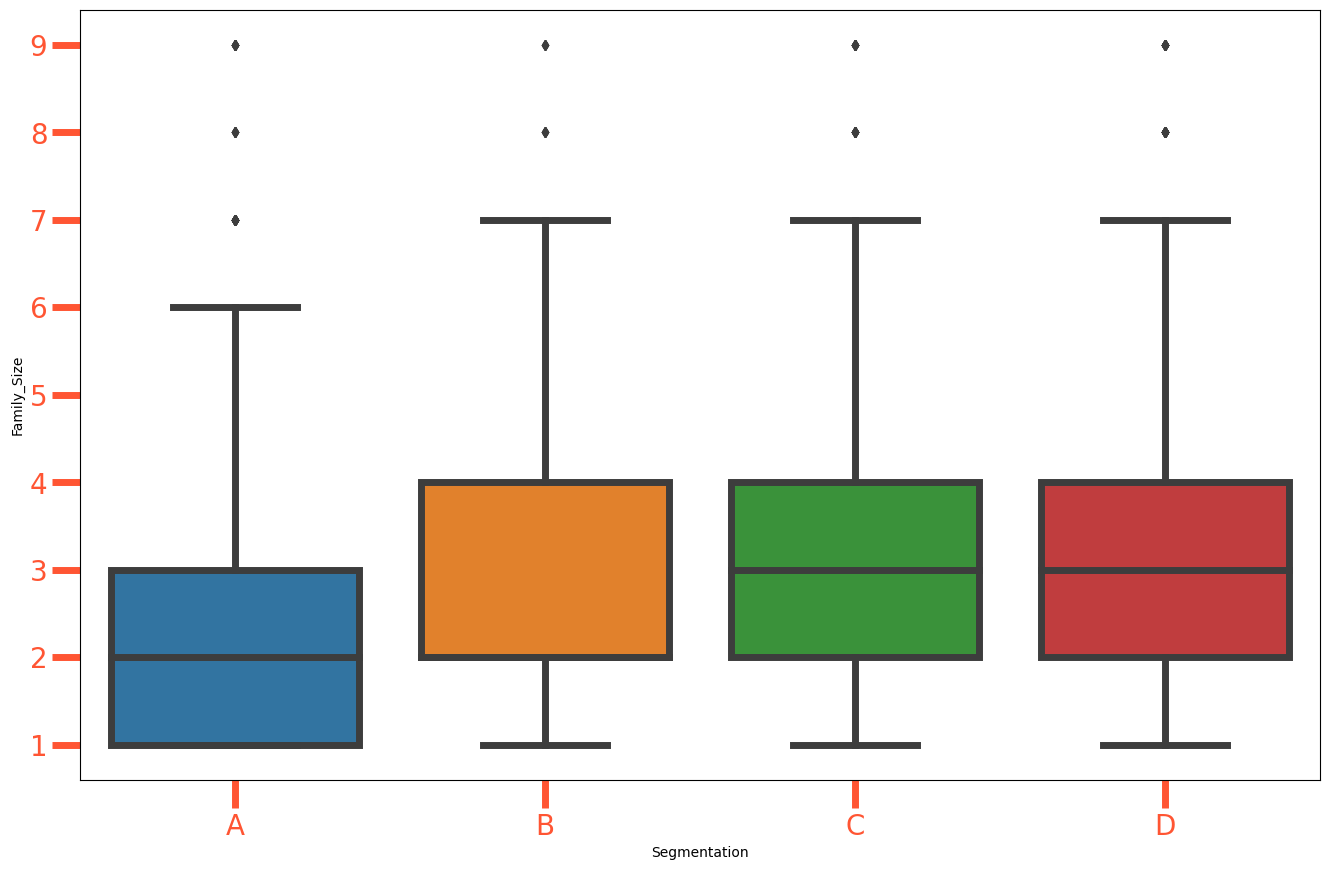

In [15]:
# we can also see the importance of features using boxplots
# if the boxplots differ from each other, then the feature is important

for col in numerical_columns:
    
    fig = plt.figure()
    fig.set_size_inches(16, 10)
    
    sns.boxplot(y=col, x = df['Segmentation'].astype('category'), data = df)
    
    plt.show()

### categorical features processing

In [16]:
df.describe(include=object)

,Gender,Ever_Married,Graduated,Profession,Spending_Score,Var_1,Segmentation
count,8068,7928,7990,7944,8068,7992,8068
unique,2,2,2,9,3,7,4
top,Male,Yes,Yes,Artist,Low,Cat_6,D
freq,4417,4643,4968,2516,4878,5238,2268


In [17]:
#fill with the most common feature in the column

for col in categorical_columns:
    most_recent = df.groupby(col).size().sort_values().index[-1]
    df[col] = df[col].fillna(most_recent)
    
df.isna().sum()

Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
Segmentation       0
dtype: int64

In [18]:
df.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
ID,,,,,,,,,,
462809,Male,No,22,No,Healthcare,1.000000,Low,4.0,Cat_4,D
462643,Female,Yes,38,Yes,Engineer,2.641663,Average,3.0,Cat_4,A
466315,Female,Yes,67,Yes,Engineer,1.000000,Low,1.0,Cat_6,B
461735,Male,Yes,67,Yes,Lawyer,0.000000,High,2.0,Cat_6,B
462669,Female,Yes,40,Yes,Entertainment,2.641663,High,6.0,Cat_6,A


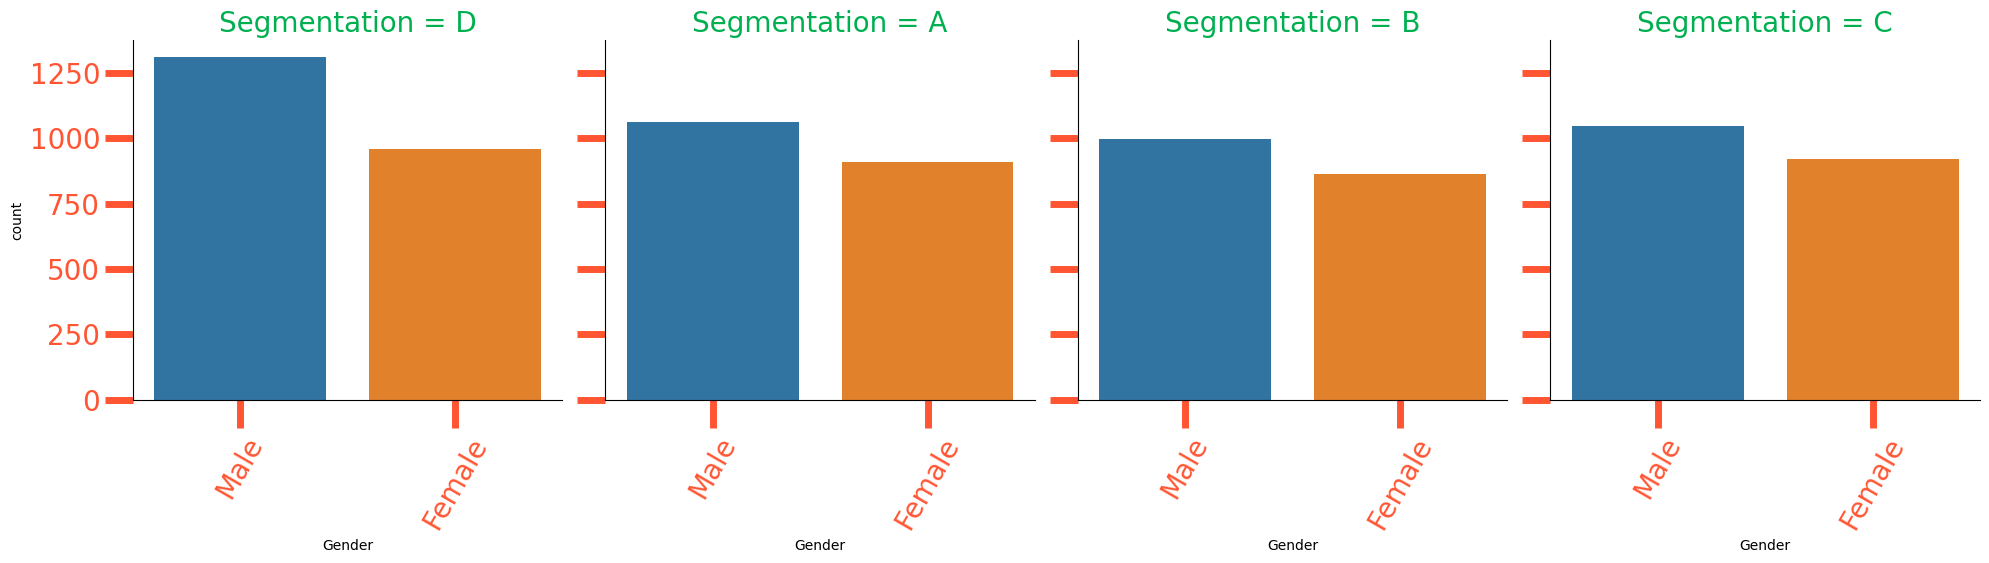

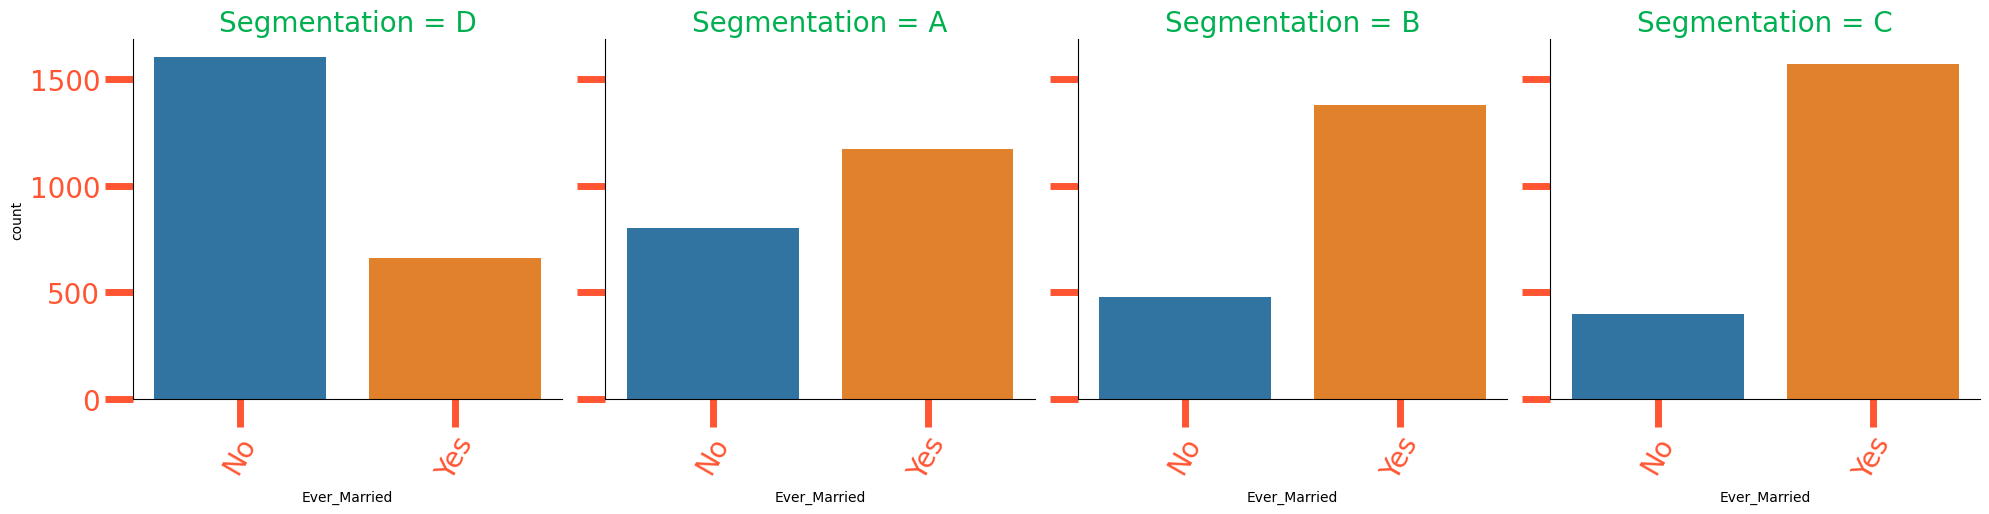

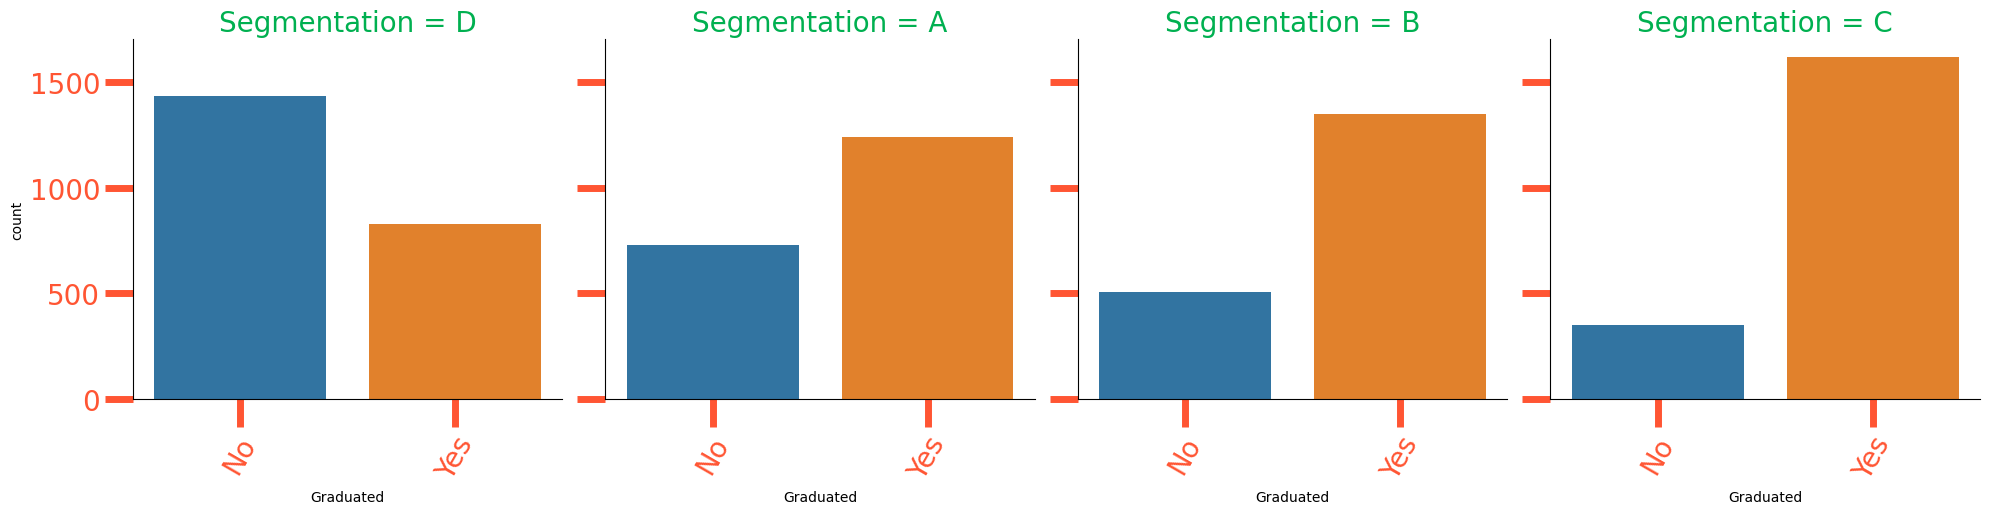

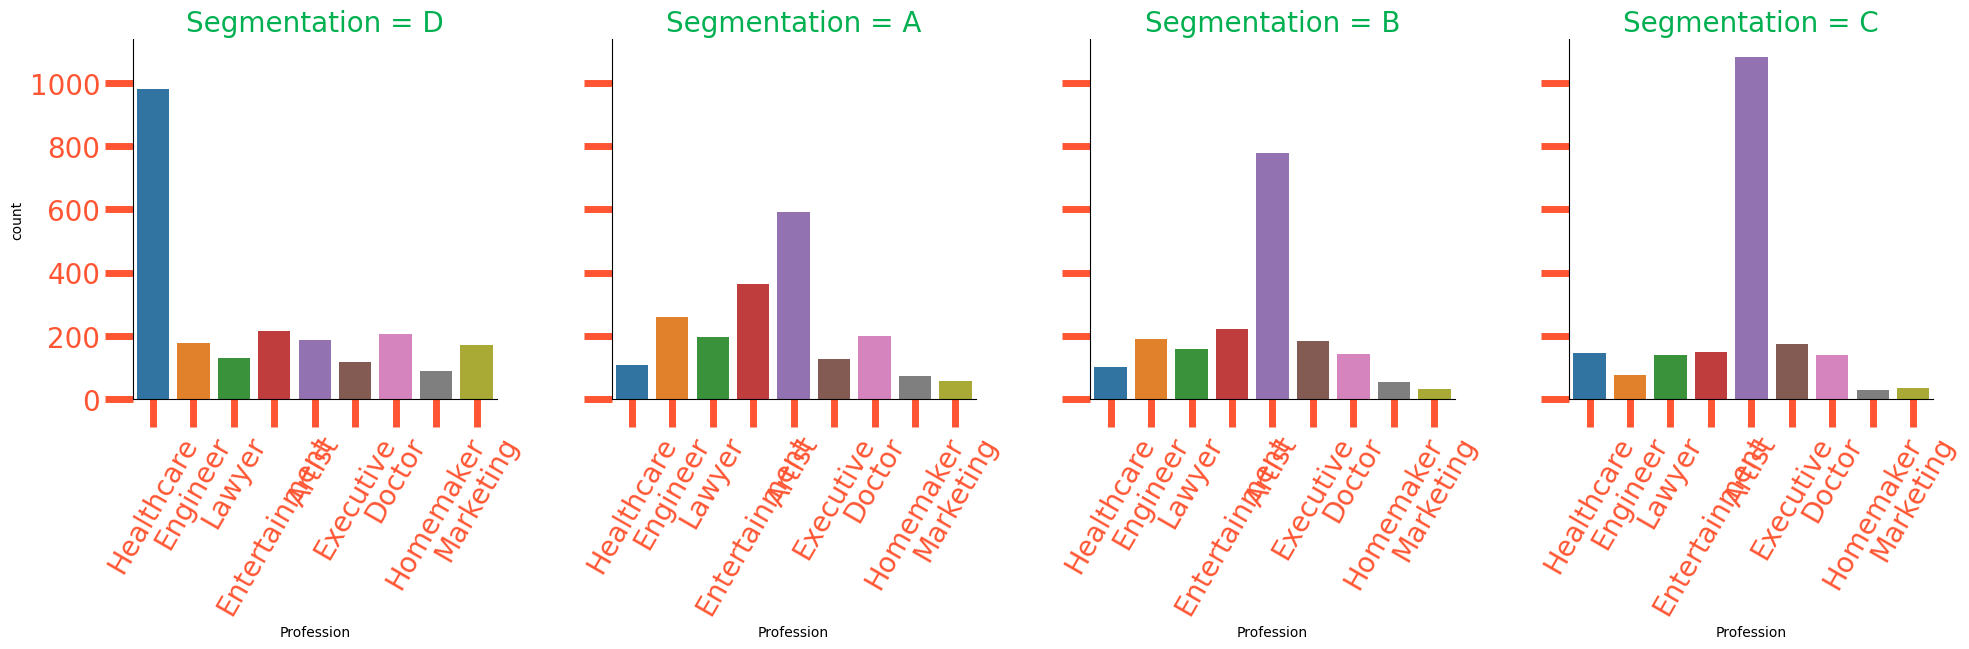

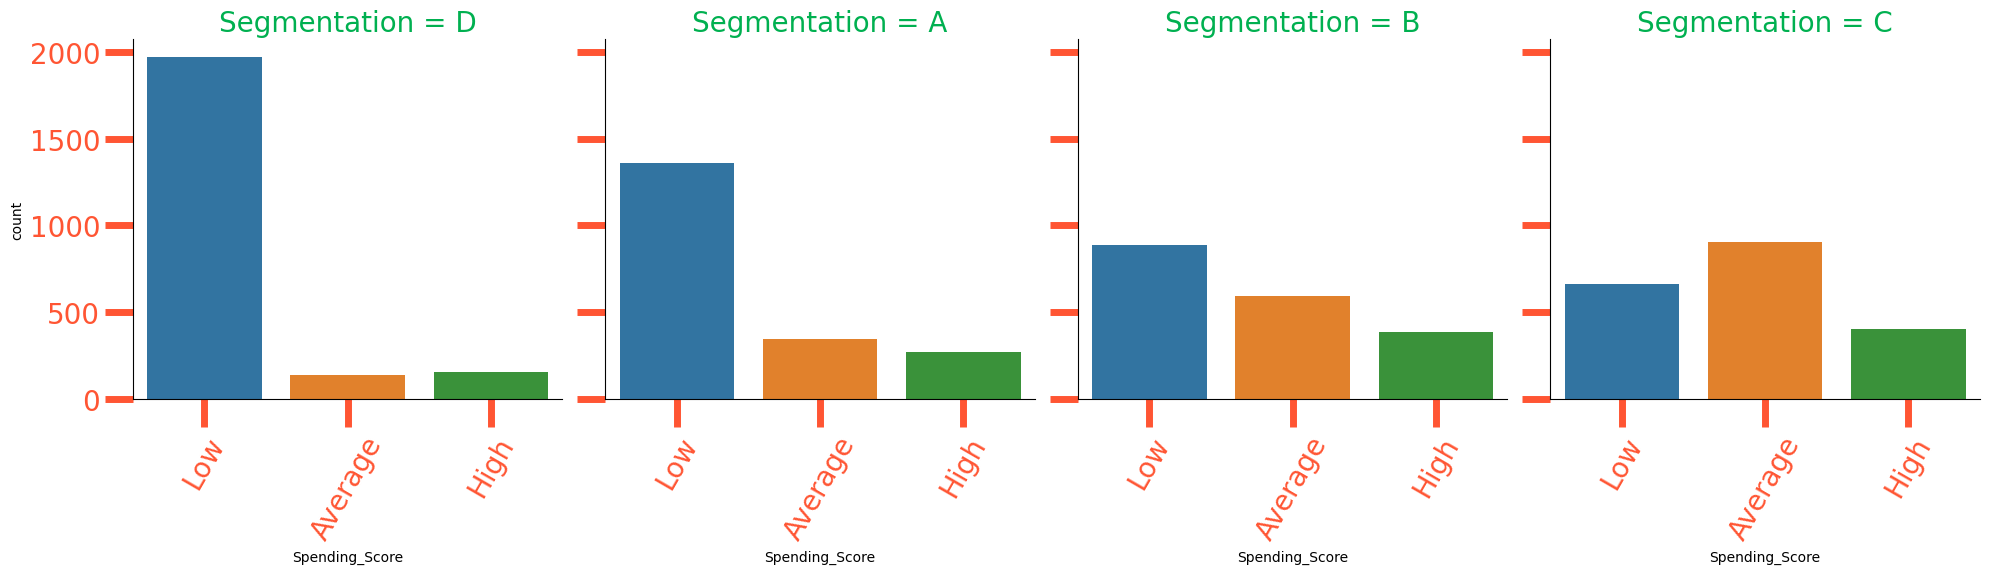

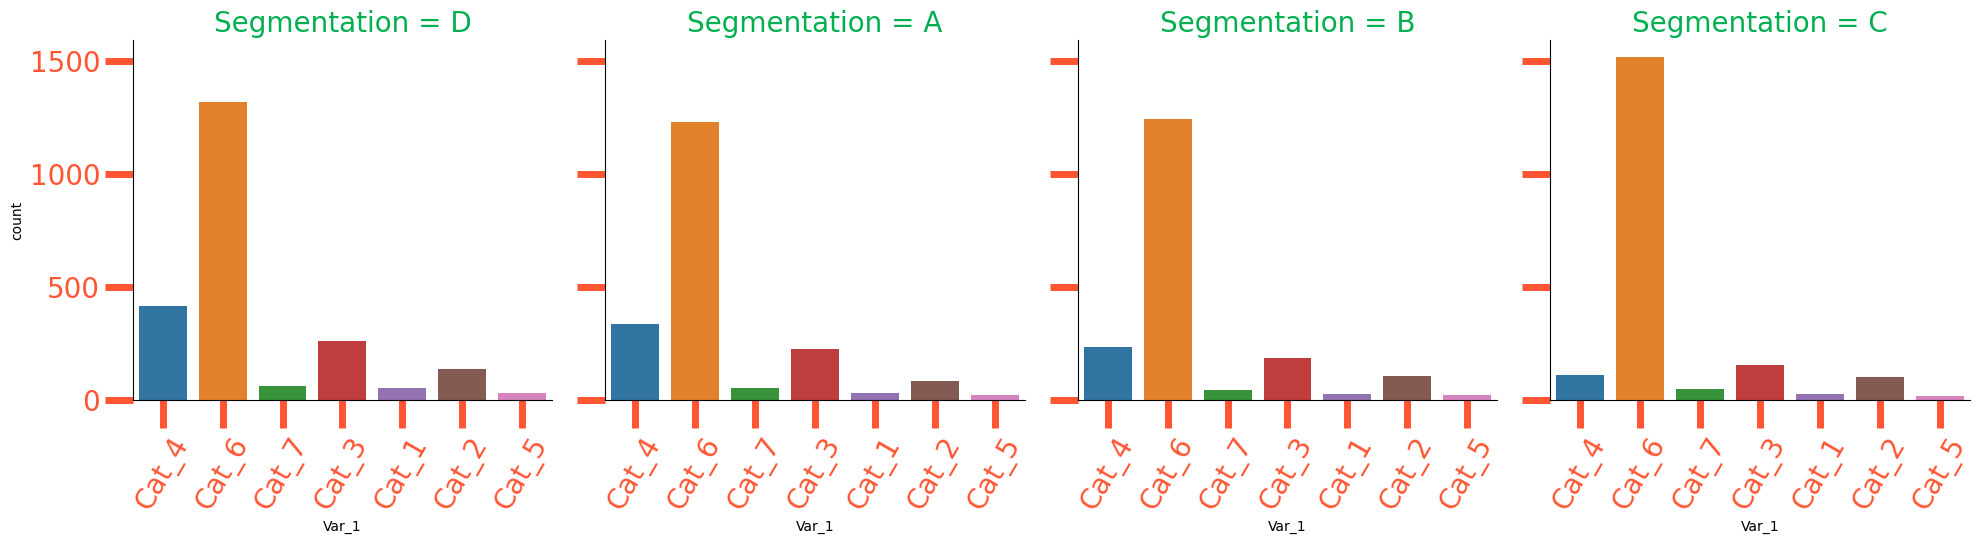

In [19]:
#barcharts to show the importance of a categorical features


for col in categorical_columns:
    if col != 'Segmentation':
        g = sns.catplot(x=col, kind='count', col='Segmentation', data=df)
        g.set_xticklabels(rotation=60)

### categorical features encoding

In [20]:
df.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
ID,,,,,,,,,,
462809,Male,No,22,No,Healthcare,1.000000,Low,4.0,Cat_4,D
462643,Female,Yes,38,Yes,Engineer,2.641663,Average,3.0,Cat_4,A
466315,Female,Yes,67,Yes,Engineer,1.000000,Low,1.0,Cat_6,B
461735,Male,Yes,67,Yes,Lawyer,0.000000,High,2.0,Cat_6,B
462669,Female,Yes,40,Yes,Entertainment,2.641663,High,6.0,Cat_6,A


In [21]:
df.describe(include=object)

,Gender,Ever_Married,Graduated,Profession,Spending_Score,Var_1,Segmentation
count,8068,8068,8068,8068,8068,8068,8068
unique,2,2,2,9,3,7,4
top,Male,Yes,Yes,Artist,Low,Cat_6,D
freq,4417,4783,5046,2640,4878,5314,2268


In [22]:
#function for mean-target encoding

def encode_multiclass_target(df, category, target='Segmentation'):
    df = df[[category, target]].copy()
    
    target_dummies = pd.get_dummies(df[target], 
                                    prefix=category, 
                                    drop_first=True)
    
    df = pd.concat((df, target_dummies), axis=1)
    
    for tg in target_dummies.columns:
        
        df[tg] = df.groupby(category)[tg].transform("mean")
    
    return df.drop(category, axis=1)

In [23]:
#encoding

for col in categorical_columns.drop("Segmentation"):
    if df[col].nunique() < 4:
        one_hot = pd.get_dummies(df[col], prefix=col, drop_first=True, dtype=int)     
        df = pd.concat((df.drop(col, axis=1), one_hot), axis=1)
        
    else:
        mean_target = encode_multiclass_target(df, col).drop("Segmentation", axis=1)
        df = pd.concat((df.drop(col, axis=1), mean_target), axis=1)

In [24]:
df.head()

,Age,Work_Experience,Family_Size,Segmentation,Gender_Male,Ever_Married_Yes,Graduated_Yes,Profession_B,Profession_C,Profession_D,Spending_Score_High,Spending_Score_Low,Var_1_B,Var_1_C,Var_1_D
ID,,,,,,,,,,,,,,,
462809,22,1.000000,4.0,D,1,0,0,0.075826,0.109610,0.734985,0,1,0.213039,0.100092,0.381084
462643,38,2.641663,3.0,A,0,1,1,0.270386,0.107296,0.251788,0,0,0.213039,0.100092,0.381084
466315,67,1.000000,1.0,B,0,1,1,0.270386,0.107296,0.251788,0,1,0.234287,0.285472,0.248400
461735,67,0.000000,2.0,B,1,1,1,0.253612,0.224719,0.205457,1,0,0.234287,0.285472,0.248400
462669,40,2.641663,6.0,A,0,1,1,0.232877,0.155954,0.226554,1,0,0.234287,0.285472,0.248400


In [25]:
#split the dataset 

X = df.drop('Segmentation', axis=1)
Y = df['Segmentation']

In [26]:
#class imbalance check

Y.value_counts()

D    2268
A    1972
C    1970
B    1858
Name: Segmentation, dtype: int64

# ONE vs ALL

In [27]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                                   random_state=0, 
                                                   test_size=0.2)

In [28]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import SGDClassifier

pipe = Pipeline([('scaler', StandardScaler()),
                    ('one_vs_all', OneVsRestClassifier(SGDClassifier(loss='log_loss')))])

pipe.fit(X_train, Y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('one_vs_all',
                 OneVsRestClassifier(estimator=SGDClassifier(loss='log_loss')))])

In [29]:
print(pipe.classes_)  #classes
print(pipe.predict(X_test.head(1)))
# print(pipe.predict_proba(X_test.head(1)))  this will not work with default SGDClassifier() because it use hinge loss (SVM)
print(pipe.predict_proba(X_test.head(1)))
print(pipe.decision_function(X_test.head(1)))   #distances to diffrernt hyperplanes

['A' 'B' 'C' 'D']
['C']
[[0.27747586 0.32190244 0.36272808 0.03789363]]
[[-0.76351537 -0.5374552  -0.34106551 -3.0926388 ]]


In [30]:
# accuracy

np.mean(pipe.predict(X_test) == Y_test)

0.47026022304832715

In [31]:
# hyperparameters selection

from sklearn.model_selection import GridSearchCV

param_grid = {
    'one_vs_all__estimator__loss': ['hinge', 'log', 'modified_huber',
                                    'squared_hinge', 'perceptron'],
    
    'one_vs_all__estimator__penalty': ['l1', 'l2', 'elasticnet'],
    
    'one_vs_all__estimator__alpha': [0.001, 0.01, 0.1, 0.5, 1, 10]
}

# setting up cross-validation with pre-defined data splits

from sklearn.model_selection import PredefinedSplit

test_fold = [0 if x in X_train.index else -1 for x in X.index]
ps = PredefinedSplit(test_fold)

search = GridSearchCV(pipe, param_grid, cv=ps)

search.fit(X, Y)

print(f"Best parameter (CV score={search.best_score_:.5f}):")
print(search.best_params_)

Best parameter (CV score=0.49458):
{'one_vs_all__estimator__alpha': 0.01, 'one_vs_all__estimator__loss': 'modified_huber', 'one_vs_all__estimator__penalty': 'l2'}


# ALL vs ALL

In [32]:
from sklearn.multiclass import OneVsOneClassifier

pipe_all_all = Pipeline([('scaler', StandardScaler()),
                    ('all_vs_all', OneVsOneClassifier(SGDClassifier(loss='log_loss')))])

pipe_all_all.fit(X_train, Y_train)

print(pipe_all_all.classes_)  #classes
print(pipe_all_all.predict(X_test.head(1)))
print(pipe_all_all.decision_function(X_test.head(1)))   #distances to diffrernt hyperplanes

['A' 'B' 'C' 'D']
['A']
[[ 3.23833331  1.17770165  2.20881152 -0.28065313]]


In [33]:
# hyperparameters selection

from sklearn.model_selection import GridSearchCV

param_grid = {
    'all_vs_all__estimator__loss': ['hinge', 'log', 'modified_huber',
                                    'squared_hinge', 'perceptron'],
    
    'all_vs_all__estimator__penalty': ['l1', 'l2', 'elasticnet'],
    
    'all_vs_all__estimator__alpha': [0.001, 0.01, 0.1, 0.5, 1, 10]
}

# setting up cross-validation with pre-defined data splits

from sklearn.model_selection import PredefinedSplit

test_fold = [0 if x in X_train.index else -1 for x in X.index]
ps = PredefinedSplit(test_fold)

search = GridSearchCV(pipe_all_all, param_grid, cv=ps)

search.fit(X, Y)

print(f"Best parameter (CV score={search.best_score_:.5f}):")
print(search.best_params_)

Best parameter (CV score=0.50341):
{'all_vs_all__estimator__alpha': 0.01, 'all_vs_all__estimator__loss': 'modified_huber', 'all_vs_all__estimator__penalty': 'l2'}


In [34]:
### does exploratory data analysis (EDA) help?

from sklearn.model_selection import GridSearchCV

param_grid = {
    'all_vs_all__estimator__loss': ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron'],
    'all_vs_all__estimator__penalty': ['l1', 'l2', 'elasticnet'],
    'all_vs_all__estimator__alpha': [0.001, 0.01, 0.1, 0.5, 1, 10]
}

from sklearn.model_selection import PredefinedSplit

search = GridSearchCV(pipe_all_all, param_grid, cv=ps)

search.fit(X[numerical_columns], Y)

print(f"Best parameter (CV score={search.best_score_:.5f}):")
print(search.best_params_)

Best parameter (CV score=0.41370):
{'all_vs_all__estimator__alpha': 0.01, 'all_vs_all__estimator__loss': 'squared_hinge', 'all_vs_all__estimator__penalty': 'elasticnet'}


In [35]:
# polinomial features

X_polinomial = X.copy()

for col in numerical_columns:
    for power in [2, 3, 4]:

        to_add = (X_polinomial[col]**power).to_frame().rename({col:f"{col}_{power}"}, axis=1)
        X_polinomial = pd.concat((X_polinomial, to_add), axis=1)

In [36]:
X_polinomial.head()

,Age,Work_Experience,Family_Size,Gender_Male,Ever_Married_Yes,Graduated_Yes,Profession_B,Profession_C,Profession_D,Spending_Score_High,...,Var_1_D,Age_2,Age_3,Age_4,Work_Experience_2,Work_Experience_3,Work_Experience_4,Family_Size_2,Family_Size_3,Family_Size_4
ID,,,,,,,,,,,,,,,,,,,,,
462809,22,1.000000,4.0,1,0,0,0.075826,0.109610,0.734985,0,...,0.381084,484,10648,234256,1.000000,1.000000,1.000000,16.0,64.0,256.0
462643,38,2.641663,3.0,0,1,1,0.270386,0.107296,0.251788,0,...,0.381084,1444,54872,2085136,6.978385,18.434542,48.697851,9.0,27.0,81.0
466315,67,1.000000,1.0,0,1,1,0.270386,0.107296,0.251788,0,...,0.248400,4489,300763,20151121,1.000000,1.000000,1.000000,1.0,1.0,1.0
461735,67,0.000000,2.0,1,1,1,0.253612,0.224719,0.205457,1,...,0.248400,4489,300763,20151121,0.000000,0.000000,0.000000,4.0,8.0,16.0
462669,40,2.641663,6.0,0,1,1,0.232877,0.155954,0.226554,1,...,0.248400,1600,64000,2560000,6.978385,18.434542,48.697851,36.0,216.0,1296.0


In [37]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'all_vs_all__estimator__loss': ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron'],
    'all_vs_all__estimator__penalty': ['l1', 'l2', 'elasticnet'],
    'all_vs_all__estimator__alpha': [0.001, 0.01, 0.1, 0.5, 1, 10]
}

from sklearn.model_selection import PredefinedSplit

search = GridSearchCV(pipe_all_all, param_grid, cv=ps)

search.fit(X_polinomial, Y)

print(f"Best parameter (CV score={search.best_score_:.5f}):")
print(search.best_params_)

Best parameter (CV score=0.50124):
{'all_vs_all__estimator__alpha': 0.01, 'all_vs_all__estimator__loss': 'hinge', 'all_vs_all__estimator__penalty': 'l1'}


In [41]:
### Macro and micro metrics

from sklearn.metrics import precision_score, recall_score, f1_score


print(f"""Precision is: {precision_score(Y_test, 
                                            pipe_all_all.predict(X_test), 
                                            average='macro'):.3f}""" )

print(f"""Recall is: {recall_score(Y_test,
                                      pipe_all_all.predict(X_test),
                                      average='macro'):.3f}""" )

print(f"""F-мера is: {f1_score(Y_test, 
                                  pipe_all_all.predict(X_test),
                                  average='macro'):.3f}""" )

Precision is: 0.471
Recall is: 0.469
F-мера is: 0.449


In [40]:
### Macro and micro metrics

print(f"""Precision is: {precision_score(Y_test, 
                                            pipe_all_all.predict(X_test), 
                                            average='micro'):.3f}""" )

print(f"""Recall is: {recall_score(Y_test,
                                      pipe_all_all.predict(X_test),
                                      average='micro'):.3f}""" )

print(f"""F-мера is: {f1_score(Y_test, 
                                  pipe_all_all.predict(X_test),
                                  average='micro'):.3f}""" )

Precision is: 0.470
Recall is: 0.470
F-мера is: 0.470
